<a href="https://colab.research.google.com/github/likhit6430347321/data_analytics/blob/main/footballer_value_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## prep - install necessary library

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Import Library


*   pandas - data analytics
*   numpy - working with mathmatical functions and multidimensional numbers
*matplotlib - for graphs
* sklearn - for ML models



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

## 2. Import, Clean and Explore Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/likhit6430347321/data_science_bootcamp_07/main/app_value.csv')

In [5]:
df.head()

,player_name,player_id,yellow_cards,red_cards,goals,assists,total_minutes_played,market_value_eur
0,A.J. Soares,176850,8,0,4,0,1684,300000.0
1,AJ Leitch-Smith,115608,7,0,49,35,11900,300000.0
2,Aaron Appindangoyé,254249,220,0,0,22,121066,1800000.0
3,Aaron Bastiaans,578459,0,0,8,0,128,250000.0
4,Aaron Boupendza,427605,63,0,198,9,23274,8500000.0


In [6]:
df.shape

(17773, 8)

Change data type of 'player_id' from int to str

In [7]:
df['player_id'] = df['player_id'].astype(str)

In [8]:
df.describe()

,yellow_cards,red_cards,goals,assists,total_minutes_played,market_value_eur
count,17773.000000,17773.000000,17773.000000,17773.000000,1.777300e+04,1.777300e+04
mean,214.893378,5.103809,148.280932,111.237101,1.021556e+05,4.865877e+06
std,366.433918,14.438102,463.609592,287.428144,1.601022e+05,1.092411e+07
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+04
25%,7.000000,0.000000,0.000000,0.000000,4.864000e+03,5.000000e+05
50%,65.000000,0.000000,15.000000,16.000000,3.354000e+04,1.250000e+06
75%,256.000000,0.000000,104.000000,90.000000,1.278570e+05,4.000000e+06
max,4134.000000,234.000000,14212.000000,6880.000000,1.383228e+06,2.000000e+08


Text(0, 0.5, 'market value')

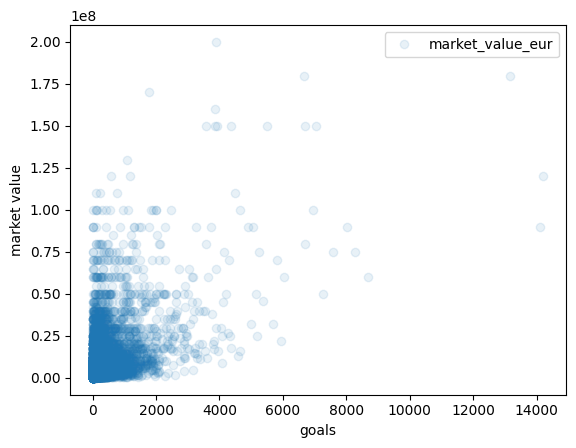

In [24]:
df.plot(x="goals", y="market_value_eur", style = "o", alpha = 0.1)
plt.xlabel("goals")
plt.ylabel("market value")

## 3. Split Data
- x = independent variables ('yellow_cards', 'red_cards', 'goals', 'assists', 'total_minutes_played')
- y = dependent variable (market_value_eur)

In [10]:
x = pd.DataFrame(df.iloc[:,2:-1])
y = pd.DataFrame(df.iloc[:,-1])

Split data into two datasets: for training and for testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [12]:
print(x_train.shape)

(12441, 5)


In [13]:
print(y_train.shape)

(12441, 1)


In [14]:
print(x_test.shape)

(5332, 5)


In [15]:
print(y_test.shape)

(5332, 1)


## 4. Train Model
Algorithm used -> Linear Regression

In [16]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

Save built model

In [17]:
filename = "LinearRegressionModel.joblib"
joblib.dump(linreg, filename)

['LinearRegressionModel.joblib']

## 5. Evaluating Model

Determining coefficients of each independent variables

In [18]:
ce = pd.DataFrame(linreg.coef_, index = ["Coefficient"]).transpose()
att = pd.DataFrame(x.columns, columns = ["Attribute"])

The comparison shows that 'yellow_cards' and 'red_cards' have negative influence to the output i.e. players with more of these cards tend to have lower market values. On the other hand, 'goals', assists', and total_minutes_played have positive influence to the output with 'assists' influecing the most. 'total_minutes_played' coefficient has significantly less value than the others in positive coefficients, stating that this variable barely affects the output.

In [19]:
ce_comparison = pd.concat([att, ce], axis = True, join = "inner")
ce_comparison

,Attribute,Coefficient
0,yellow_cards,-2123.072326
1,red_cards,-17180.213000
2,goals,4256.372159
3,assists,8906.206826
4,total_minutes_played,24.410252


In [20]:
y_pred = linreg.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ["Predicted"])

In [21]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE:  3979880.518344235
MSE:  73385293246026.64
RMSE:  1994.9637887300698
